### If you know how to download packages from github please feel free to download the current version directly from https://github.com/pineycoder/PVDataMiner


#### If you do not know then run the following three cells to install the original package and manually replace the model.py file as well as the parse and reader folders with the ones from the github.

In [1]:
# install chemdataextractor2 if needed 1.3.0
!pip install chemdataextractor==1.3.0

In [2]:
# check version- we used version 1.3.0 for this code
!pip show ChemDataExtractor

Name: ChemDataExtractor
Version: 1.3.0
Summary: A toolkit for extracting chemical information from the scientific literature.
Home-page: https://github.com/mcs07/ChemDataExtractor
Author: Matt Swain
Author-email: m.swain@me.com
License: MIT
Location: c:\users\shirley\anaconda3\lib\site-packages
Requires: PyYAML, python-crfsuite, DAWG, click, python-dateutil, nltk, requests, lxml, beautifulsoup4, pdfminer.six, six, cssselect, appdirs
Required-by: 


In [3]:
# obtain necessary data files (machine learning models, dictionaries, and word clusters) for cde to function
!cde data download

Traceback (most recent call last):
  File "C:\Users\Shirley\anaconda3\lib\site-packages\urllib3\connection.py", line 158, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\Shirley\anaconda3\lib\site-packages\urllib3\util\connection.py", line 57, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\Shirley\anaconda3\lib\socket.py", line 954, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Shirley\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 597, in urlopen
    httplib_response = self._make_request(conn, method, url,
  File "C:\Users\Shirley\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File 

In [1]:
# import parsers and document reader
from chemdataextractor.parse import mp,  MpParser 
from chemdataextractor import Document
# mptoOCV, OCVParser,, mptoPCV, PCVParser, mptoJSC,JSCParser, tg, TgParser

### You should already have folders containing downloaded scientific papers for each publisher that you have extracted from:

At present, the available readers are:
AcsHtmlReader - For ACS HTML articles
RscHtmlReader - For RSC HTML articles
NlmXmlReader - For NLM/JATS XML (e.g. from PubMed Central)
UsptoXmlReader - For patent XML from the US Patent Office
CsspHtmlReader - For ChemSpider SyntheticPages
XmlReader - Generic XML
HtmlReader - Generic HTML
PdfReader - Generic PDF
PlainTextReader - Generic plain text



##### Currently, for extracting dates our code only works for Springer Xmls, Elsevier Xmls and RSC Htmls.

### The following code checks relevancy of papers and adds irrelevant papers and those that can't be opened by chemdataextractor to ignored_files list 


It detects how many of each of the key words are in the paper and puts the frequencies in a dictionary. if one of them is not then it is marked as irrelevant.

Testers: 

SpringerXml 5 should give
_5.xml is irrelevant: {b'antimony': 1, b'selenide': 1, b'photovoltaic': 3, b'solar cell': 6}_

In [5]:
# ---------------------------------------- INPUT BOX, please input all info ----------------------------------------

# input path of files

# Springer path
path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/SpringerPapers/SpringerXml/')
# RSC path
# path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/RSCPapers/RSCHtml/')
# Elsevier path
# path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/ElsevierPapers/')

# input type of file e.g. 'xml' or 'html'
filetype = 'xml'

# input number of the highest number file -  - 122 - 174 -
maxfile = 77

# input list of mandatory words included in papers MAKE SURE THEY ARE IN BYTE FORM (b in front of string)
# NOTE: number of irrelevant files increases dramatically when joining [b'antimony selenide'] instead of seperating [b'antimony', b'selenide']
words = [b'antimony selenide', b'photovoltaic', b'solar cell']

# -------------------------------------------------- end of input box --------------------------------------------------


# NOTE if not xml, I have to work on smth that accounts for words being cut across the line.

# files that can't be opened
ignored_files = []

# irrelevant files and frequency of word apperances for each paper
new_ignored_files = []
freq_dict = {}

for i in range(maxfile +1 ):                                    # Hash1
#for i in [5]:                                                   # Hash2
    try_error = False
    try:
        f = open(path + str(i) + '.' + filetype, 'rb')
        doc = Document.from_file(f)
    except:
        print ("CANNOT OPEN " + str(i) + '.' + filetype)
        ignored_files += [i]
        try_error = True
        pass
    
    if try_error == False: 
        words_count = {}
        relevance = True
        f = open(path + str(i) + '.' + filetype, 'rb')   
        readlines = f.readlines()

        for word in words:
            count = 0
            for h, line in enumerate(readlines):
                count+=line.lower().count(word.lower())
                #print(i,h,word, count, line.lower().count(word.lower()))    # UNCOMMENT THIS LINE to see the progress of finding relevant words within the file(s)
            
            words_count[word] = count
            if (relevance == True) and (count != 0):
                relevance = True
            else:
                relevance = False
        freq_dict[i] = words_count
        if relevance == False:
            new_ignored_files += [i]
            print(f'! {i}.{filetype} is IRRELEVANT: {freq_dict[i]}') # comment this line to remove printing irrelevant paper info 
        else:
            print(f'{i}.{filetype} is relevant: {freq_dict[i]}')    # comment this line to remove printing relevant paper info 
            

total_ignored_files = ignored_files + new_ignored_files




print(f"Ignored files from opening: {ignored_files}")
print(f"Ignored files from relevancy: {new_ignored_files}")

print(f"{len(total_ignored_files)} total ignored files ({len(ignored_files)}+{len(new_ignored_files)}) : {total_ignored_files}")

#new_ignored_files, total_ignored_files, freq_dict = relevancy_check(maxfile, path, filetype, words, ignored_files)
#print(f"Ignored files from relevance are {new_ignored_files}")

! 0.xml is IRRELEVANT: {b'antimony selenide': 0, b'photovoltaic': 7, b'solar cell': 5}
1.xml is relevant: {b'antimony selenide': 1, b'photovoltaic': 6, b'solar cell': 13}
! 2.xml is IRRELEVANT: {b'antimony selenide': 0, b'photovoltaic': 1, b'solar cell': 0}
! 3.xml is IRRELEVANT: {b'antimony selenide': 0, b'photovoltaic': 19, b'solar cell': 59}
4.xml is relevant: {b'antimony selenide': 1, b'photovoltaic': 47, b'solar cell': 108}
5.xml is relevant: {b'antimony selenide': 1, b'photovoltaic': 3, b'solar cell': 6}
6.xml is relevant: {b'antimony selenide': 1, b'photovoltaic': 17, b'solar cell': 11}
! 7.xml is IRRELEVANT: {b'antimony selenide': 0, b'photovoltaic': 2, b'solar cell': 2}
! 8.xml is IRRELEVANT: {b'antimony selenide': 0, b'photovoltaic': 1, b'solar cell': 14}
! 9.xml is IRRELEVANT: {b'antimony selenide': 0, b'photovoltaic': 1, b'solar cell': 1}
! 10.xml is IRRELEVANT: {b'antimony selenide': 0, b'photovoltaic': 1, b'solar cell': 1}
! 11.xml is IRRELEVANT: {b'antimony selenide': 0,

#### ignored files status


#### Springer (xml)


**73/77** 'CANNOT OPEN': [72, 73, 74, 75] -> all just article names and citations, no content



#### RSC (html)


**122/122** 'CANNOT OPEN': []



#### Elsevier (xml)


**174/174** 'CANNOT OPEN': []

#### Parser status


Parser for open circuit voltage (VOC) works! (but doesnt detect the VOC on pg6)

Parser for short circuit current density (JSC) works (but units detect mA instead of mA cm-2 because the latter doesnt work)

Parser for fill factor (FF) works.

Parser for conversion efficiencies works but struggles to assign the correct efficiencies to the correct chemical (many many values quoted in paper).

Parser for band gap also identifies binding energy as band gap- needs adjustment.

change variable name by modifying within interpret in MpParser class in your parser and adding variable within the Compound class of model.py

### The following cell takes files and parses through, storing the data in a txt file. 

##### if you wish to create new parsers, please consult the following website: 

https://cambridgemolecularengineering-chemdataextractor-development.readthedocs-hosted.com/en/release/getting_started.html

In [8]:
# input path of files

# Springer path
path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/SpringerPapers/SpringerXml/')
# RSC path
# path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/RSCPapers/RSCHtml/')
# Elsevier path
# path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/ElsevierPapers/')


# input type of file e.g. 'xml' or 'html'
filetype = 'xml'

# input number of the highest number file
maxfile = 77

# input relevant property eg. ['OCV', 'open_circuit_voltage']  or ['JSC', 'short_circuit_current_density'] or ['FF', 'fill_factor']
# NOTE: MAKE SURE U CHANGE BOTH THE PARSER PYTHON FILE NAME (to mp.py) AND THE ABBREVIATION HERE! ~have not figured out how to run all parsers at once

property_abbreviation_full = ['OCV', 'open_circuit_voltage']


# if you did NOT make an ignored_files list from the previous cell, uncomment the line below
# ignored_files = []

# -------------------------------------------------- end of input box --------------------------------------------------




# To run on a test file, move #s to Hash1 lines and check test file name. to run on all files, move to Hash2 lines

for i in range(maxfile +1 ):                                    # Hash1
#for i in [1]:                                                  # Hash2
    try_error = False
    try:
        f = open(path + str(i) + '.' + filetype, 'rb')          # Hash1
    #    f = open(path +'pdfpaper.pdf', 'rb')                   # Hash2
        doc = Document.from_file(f)
    except:
        print ("CANNOT OPEN" + str(i) + '.' + filetype)
        try_error = True
        ignored_files += [i]
        pass
    
    if try_error == False:               
        f = open(path + str(i) + '.' + filetype, 'rb')          # Hash1
    #    f = open(path +'pdfpaper.pdf', 'rb')                   # Hash2

        doc = Document.from_file(f)
        doc.parsers = [ MpParser]

        with open(path + f'output{property_abbreviation_full[0]}{i}.txt', 'w', encoding='utf-8') as f:
            for record in doc.records:
                f.write(str(record.serialize()))
                print(record.serialize())
                f.write('\n')
    else:
        pass




{'names': ['s41377-022-00904-7']}
{'names': ['/ 128']}
{'names': ['/ 145']}
{'names': ['/ 123']}
{'names': ['K. Khadheer4']}
{'names': ['Karnataka']}
{'names': ['Parkville Campus']}
{'names': ['Melbourne']}
{'names': ['VIC']}
{'names': ['2019R1A6C1010042']}
{'names': ['Jayaraman']}
{'names': ['Seung Jun']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['silver']}
{'names': ['ceramic oxides']}
{'names': ['The element']}
{'names': ['H•']}
{'names': ['1H2O + PLI→']}
{'names': ['e-']}
{'names': ['CH3•']}
{'names': ['CH3CH2•']}
{'names': ['whereMisthetargetedmetal']}
{'names': ['Neodymium']}
{'names': ['ytt

{'names': ['M. S.1']}
{'names': ['E. M.1']}
{'names': ['Box 87']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['NonStandardArchiveJournal']}
{'names': ['chalcogen']}
{'names': ['Cd']}
{'names': ['Ga']}
{'names': ['Zn']}
{'names': ['Ag']}
{'names': ['copper-based chalcogenides']}
{'names': ['SnO2']}
{'names': ['CuCl2']}
{'names': ['H2SeO3']}
{'names': ['Cu(NO3)2']}
{'names': ['copper nitrate trihydrate Cu(NO3)2.3H2O']}
{'names': ['selenium dioxide SeO2']}
{'names': ['bismuth nitrate pentahydrate']}
{'names': ['ammonium nitrate NH4NO3']}
{'names': ['nitric acid HNO3']}
{'names': ['ethanol absolute']}
{

{'names': ['Optoelectron']}
{'names': ['s12200-022-00017-4']}
{'names': ['He']}
{'names': ['Yongli He']}
{'names': ['Boxiang Song']}
{'names': ['Jiang12']}
{'names': ['His']}
{'names': ['antimony selenide ( Sb2Se3 )']}
{'names': ['halide']}
{'names': ['perovskites']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['3sin']}
{'names': ['φr =']}
{'names': ['+f2-f']}
{'names': ['6U <']}
{'names': ['silicon dioxide']}
{'names': ['Al']}
{'names': ['R,ω∂ωω =']}
{'names': ['ω2ω =']}
{'names': ['quartz']}
{'names': ['Aplanatic metalens']}
{'names': ['9OPD']}
{'names': ['′P¯ =']}
{'names': ['sinU =']}
{'names': [

{'names': ['Scientific Reports']}
{'names': ['Sci Rep']}
{'names': ['s41598-022-06142-6']}
{'names': ['Rajeev34']}
{'names': ['grid.411877.c']}
{'names': ['Box 516']}
{'names': ['20']}
{'names': ['Rupnagar']}
{'names': ['2D-PdS2']}
{'names': ['2D-PdSe2']}
{'names': ['publisher-imprint-name']}
{'names': ['Nature Portfolio']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['NonStandardArchiveJournal']}
{'names': ['boron nitride ( BN )']}
{'names': ['Mo']}
{'names': ['Ti']}
{'names': ['palladium']}
{'names': ['dichalcogenides']}
{'names': ['sulphur']}
{'names': ['TMD']}
{'names': ['SiO2']}
{'names': ['PtSe2']}
{'names': ['2D-PdQ2']}
{'names': 

{'names': ['s41524-021-00596-4']}
{'names': ['Zhilong12']}
{'names': ['Junfei12']}
{'names': ['Qingxun12']}
{'names': ['SiCheng12']}
{'names': ['Quaternary chalcogenide']}
{'names': ['publisher-imprint-name']}
{'names': ['Nature Portfolio']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['NonStandardArchiveJournal']}
{'names': ['quaternary chalcogenides']}
{'names': ['sphalerite']}
{'names': ['silicon']}
{'names': ['Te']}
{'names': ['Cd']}
{'names': ['Ga']}
{'names': ['Sn']}
{'names': ['Cu2BaSnS4-xSex(CBTSSe)']}
{'names': ['Cu']}
{'names': ['Ag']}
{'names': ['Sr']}
{'names': ['chalcogenide']}
{'names': ['perovskite']}
{'names': ['chalcogen

{'names': ['s40820-021-00660-0']}
{'names': ['2D materials']}
{'names': ['Lin']}
{'names': ['Li']}
{'names': ['Ibarlucea']}
{'names': ['Bergoi12131415']}
{'names': ['Hongbin10']}
{'names': ['Mark H.23456']}
{'names': ['Gianaurelio12131415']}
{'names': ['33']}
{'names': ['( 2D ) transition-metal dichalcogenides']}
{'names': ['nTMDC']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['issue-online-date-year']}
{'names': ['issue-online-date-month']}
{'names': ['issue-online-date-day']}
{'names': ['issue-print-date-year']}
{'names': ['issue-print-date-month']}
{'names': ['issue-print-date-day']}
{'names': ['

{'names': ['Nature Communications']}
{'names': ['Nat Commun']}
{'names': ['/ 128']}
{'names': ['/ 120']}
{'names': ['Caixia12']}
{'names': ['Qiao12']}
{'names': ['Yunfeng12']}
{'names': ['Fuzhou']}
{'names': ['Cu2ZnSn(S,Se)4']}
{'names': ['publisher-imprint-name']}
{'names': ['Nature Portfolio']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['NonStandardArchiveJournal']}
{'names': ['Kesterite Cu2ZnSn(S,Se)4']}
{'names': ['i-ZnO']}
{'names': ['Cd2+']}
{'names': ['S2−']}
{'names': ['S element']}
{'names': ['Mo element']}
{'names': ['1,2-ethanedithiol']}
{'names': ['ethylenediamine']}
{'names': ['HOCH2CH2NH2']}
{'names': ['HSCH2COOH']}
{'nam

{'names': ['s40820-021-00637-z']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['issue-online-date-year']}
{'names': ['issue-online-date-month']}
{'names': ['issue-online-date-day']}
{'names': ['issue-print-date-year']}
{'names': ['issue-print-date-month']}
{'names': ['issue-print-date-day']}
{'names': ['1κmin =']}
{'names': ['mini-Brillouin zone']}
{'names': ['2S =']}
{'names': ['π2κB2T3e']}
{'names': ['∂n(E)∂E+']}
{'names': ['∂μ(E)∂EE =']}
{'names': ['Pb1−xEuxTe']}
{'names': ['PbTe1−xSex']}
{'names': ['GeTe']}
{'names': ['ΔDD2']}
{'names': ['ErAs']}
{'labels': ['0D']}
{'names': ['lead oleate']}
{'na

{'names': ['Scientific Reports']}
{'names': ['Sci Rep']}
{'names': ['s41598-021-82446-3']}
{'names': ['Yasser T.1']}
{'names': ['Mohamed3']}
{'names': ['Sackville Street']}
{'names': ['antimony(III)']}
{'names': ['ethylxanthate']}
{'names': ['publisher-imprint-name']}
{'names': ['Nature Portfolio']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['NonStandardArchiveJournal']}
{'names': ['Metal chalcogenides']}
{'names': ['Copper indium gallium selenide', 'CIGS']}
{'names': ['cadmium']}
{'names': ['ternary chalcogenides']}
{'names': ['NiCo2S4']}
{'names': ['– III2–VI4']}
{'names': ['Ga']}
{'names': ['chalcopyrite']}
{'names': ['SnS']}
{'name

{'names': ['s10854-020-04383-7']}
{'names': ['Ganesh Shridhar1']}
{'names': ['N']}
{'names': ['R. Y.2']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['issue-online-date-year']}
{'names': ['issue-online-date-month']}
{'names': ['issue-online-date-day']}
{'names': ['issue-print-date-year']}
{'names': ['issue-print-date-month']}
{'names': ['issue-print-date-day']}
{'names': ['Bi2Te2.7Se0.3 tetradymite']}
{'names': ['graphene']}
{'names': ['Ni']}
{'names': ['bismuth selenium telluride']}
{'names': ['copper']}
{'names': ['TeSe']}
{'names': ['quartz']}
{'names': ['1βcosθ =']}
{'names': ['Field emission sca

{'names': ['s13705-020-00263-4']}
{'names': ['Steinamangerstrasse 21, 7423']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['Biogas']}
{'names': ['photovoltaic plants'], 'roles': ['data of']}
{'labels': ['151']}
{'names': ['Coal mines']}
{'names': ['mercury']}
{'names': ['chromium ( VI )']}
{'names': ['diarsenic trioxide']}
{'names': ['cadmium nitrate']}
{'names': ['PCBs']}
{'names': ['diantimony trioxide']}
{'names': ['titanium dioxide']}
{'names': ['zinc dioxide']}
{'names': ['citrate']}
{'names': ['lead sulphide']}
{'names': ['strontium']}
{'names': ['barium']}
{'names': ['lead oxide']}
{'names': [

{'names': ['Scientific Reports']}
{'names': ['Sci Rep']}
{'names': ['s41598-020-64092-3']}
{'names': ['Geoffrey23']}
{'names': ['Florent4']}
{'names': ['Messaddeq']}
{'names': ['000000009050662X']}
{'names': ['Qc']}
{'names': ['quaternary sulfide']}
{'names': ['Er3+ 4I13']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['NonStandardArchiveJournal']}
{'names': ['quaternary chalcogenides']}
{'names': ['70Ga2S3:23La2S3:6La2O3']}
{'names': ['Ge33As12Se55']}
{'names': ['Se']}
{'names': ['Ge30Ga5Se64Er1']}
{'names': ['Ga5Ge20Sb10S(Se)65']}
{'names': ['(GeS2)67(Ga2S3)33']}
{'names': ['As2S3']}
{'names': ['As2

{'names': ['Lin']}
{'names': ['Waterloo']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['issue-online-date-year']}
{'names': ['issue-online-date-month']}
{'names': ['issue-online-date-day']}
{'names': ['MoTe2']}
{'names': ['GeSe']}
{'names': ['Ti3C2']}
{'names': ['Ti4N3']}
{'names': ['Xenes']}
{'names': ['arsenene']}
{'names': ['bismuthine']}
{'names': ['graphite']}
{'names': ['Nz']}
{'names': ['bismuth']}
{'names': ['Sb']}
{'names': ['transition metal carbides']}
{'names': ['hydrofluoric acids']}
{'names': ['Mn+1AXn']}
{'names': ['transition metal']}
{'names': ['P']}
{'names': ['Ga']}
{'names': ['Ge

{'names': ['Juanjuan12']}
{'names': ['Rong12']}
{'names': ['Zhiyang12']}
{'names': ['Qiuyuan12']}
{'names': ['Getinet Y.12']}
{'names': ['Wangwei12']}
{'names': ['Ruixiang12']}
{'names': ['CV4 7AL']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['NonStandardArchiveJournal']}
{'names': ['Sb2S3–thiourea']}
{'names': ['( b–d )']}
{'names': ['Sb2S3 cuboid']}
{'names': ['CH3NH3PbI3']}
{'names': ['PEDOT']}
{'names': ['CsPbBr3']}
{'names': ['PbI2']}
{'names': ['Sb']}
{'names': ['Ti–O']}
{'names': ['S–Sb']}
{'names': ['2,2′,7,7′-tetrakis-(N,N-di-p-methoxyphenyl-amine)-9,9′-spirobifluorene']}
{'names': ['glyce

{'names': ['s11671-019-2858-5']}
{'names': ['Nano Express']}
{'names': ['Wook Hyun']}
{'names': ['Soo-Min']}
{'names': ['18-ET-01']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['chalcogenides']}
{'names': ['copper'], 'labels': ['I']}
{'names': ['sulfide']}
{'names': ['antimony sulfide ( Sb2S3 )']}
{'names': ['hydrazine']}
{'names': ['N2H4']}
{'names': ['Pb']}
{'names': ['2,2′,7,7′-tetrakis[N,N-di(4-methoxyphenyl)amine]-9,9′-spirobifluorene ( Spiro-OMeTAD )']}
{'names': ['Mg2+']}
{'names': ['Ba2+']}
{'names': ['Al3+']}
{'names': ['Li']}
{'names': ['1-decylphosphonic acid', 'DPA']}
{'names': ['butyldi

{'names': ['copper—bismuth chalcogenides']}
{'names': ['L69 7ZF']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['Cu-Sb-chalcogenide']}
{'names': ['peg CO2']}
{'names': ['Sb–150,000']}
{'names': ['S–83,000']}
{'names': ['Se–3300']}
{'names': ['Te–450']}
{'names': ['Bi–S']}
{'names': ['Cu-Sb-Se']}
{'names': ['Cu-Bi-Se']}
{'names': ['Cu-Bi-Te']}
{'names': ['ternary metal sulfides']}
{'names': ['diamond']}
{'names': ['Si']}
{'names': ['Cu-Sb,Bi-chalcogenides']}
{'names': ['Bi']}
{'names': ['Cu6[Cu4(Fe,Zn)2]Sb4S13']}
{'names': ['Zn']}
{'names': ['Cu12+x+Sb4+y S130 ≤ x ≤']}
{'glass_transitions': [{'value': '118.5', 'units': '°C'}]}
{'names':

{'names': ['Nano Express']}
{'names': ['Kun']}
{'names': ['Xin']}
{'names': ['Fu']}
{'names': ['Antimony chalcogenide']}
{'names': ['kfjj201507']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['silicon']}
{'names': ['perovskite']}
{'names': ['cadmium telluride']}
{'names': ['(CdTe)-based']}
{'names': ['Cu2ZnSnSxSe4']}
{'names': ['antimony sulfide ( Sb2S3 )']}
{'names': ['Sb']}
{'names': ['CdTe']}
{'names': ['Aladdin']}
{'names': ['4 Pa']}
{'names': ['N2']}
{'names': ['selenium']}
{'names': ['quartz']}
{'names': ['xenon']}
{'short_circuit_current_density': [{'value': '0.14', 'units': 'mA'}]}
{'short_ci

{'names': ['Scientific Reports']}
{'names': ['Sci Rep']}
{'names': ['/ 128']}
{'names': ['/ 132']}
{'names': ['K.6']}
{'names': ['Bureau']}
{'names': ['grid.461889.a']}
{'names': ['000000009050662X']}
{'names': ['Studentska 573']}
{'names': ['Cedex']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['NonStandardArchiveJournal']}
{'names': ['1Y =']}
{'names': ['X1+']}
{'names': ['b11X12+']}
{'names': ['b22X22+']}
{'names': ['b33X32+']}
{'names': ['b12']}
{'names': ['Ar+']}
{'names': ['chalcogen']}
{'names': ['Ge-Sb-Se']}
{'names': ['YSP(Ge) < YSP(Sb) < YSP(Se)']}
{'names': ['tellurium']}
{'names': ['sulfu

{'names': ['Hg1−xCdxTe']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-year']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['NonStandardArchiveJournal']}
{'names': ['issue-online-date-year']}
{'names': ['issue-online-date-month']}
{'names': ['issue-online-date-day']}
{'names': ['issue-print-date-year']}
{'names': ['issue-print-date-month']}
{'names': ['issue-print-date-day']}
{'names': ['marion.reine']}
{'names': ['mercury cadmium telluride', 'Mercury cadmium telluride']}
{'names': ['HgCdTe']}
{'names': ['Optoelectron']}
{'names': ['s12200-015-0546-3']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-pricelist-ye

{'names': ['Scientific Reports']}
{'names': ['Sci Rep']}
{'names': ['BFsrep05998']}
{'names': ['/ 120']}
{'names': ['/ 128']}
{'names': ['/ 145']}
{'names': ['Ge-Bo']}
{'names': ['Klockmannite copper selenide']}
{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['issue-online-date-year']}
{'names': ['issue-online-date-month']}
{'names': ['issue-online-date-day']}
{'names': ['Transition metal chalcogenides']}
{'names': ['metal chalcogenides']}
{'names': ['Cu1.8Se']}
{'names': ['tetragonal umangite']}
{'names': ['Cu3Se2']}
{'names': ['hexagonal klockmannite']}
{'names': ['orthorhombic athabascaite']}
{'names': ['Cu5Se4']}
{'names': ['copper']}

{'names': ['publisher-imprint-name']}
{'names': ['issue-toc-levels']}
{'names': ['issue-copyright-holder']}
{'names': ['issue-copyright-year']}
{'names': ['article-contains-esm']}
{'names': ['article-numbering-style']}
{'names': ['article-registration-date-year']}
{'names': ['article-registration-date-month']}
{'names': ['article-registration-date-day']}
{'names': ['article-toc-levels']}
{'names': ['carbon dioxide']}
{'names': ['gasoline']}
{'names': ['selenium']}
{'names': ['Metal oxides']}
{'names': ['perovskite']}
{'names': ['lanthanum strontium titanium oxide']}
{'names': ['manganese']}
{'names': ['cobalt oxides']}
{'names': ['bismuth']}
{'names': ['antimony']}
{'names': ['cobalt antimonide']}
{'names': ['CoSb3']}
{'names': ['transition metals']}
{'names': ['rare-earth']}
{'names': ['strontium']}
{'names': ['sodium']}
{'names': ['tellurium']}
{'names': ['Li']}
{'names': ['Tellurium-']}
{'names': ['germanium']}
{'names': ['selenides']}
{'names': ['methane']}
{'names': ['hydrogen']}


### The following cell extracts the dates from each file and puts it in a dictionary

In [13]:
# input publisher e.g. 'SpringerXml' or 'RSCHtml' or 'ElsevierXml'
publisher = 'RSCHtml'
path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/RSCPapers/RSCHtml/')
filetype = 'html'
# maxfile = 77

# -------------------------------------------------- end of input box --------------------------------------------------


dates = {}

split_line = False

if publisher == 'ElsevierXml':
    
    for i in range(maxfile +1 ):
        if (i in ignored_files) == False:
            with open(path + f'{str(i)}.{filetype}', 'r', encoding='utf-8') as f:
                for line in f.readlines():
                    if ("<xocs:orig-load-date yyyymmdd=" in line):
                        # format of output date: yyyymmdd
                        s = line
                        pub_date_raw = s[s.find('<xocs:orig-load-date yyyymmdd="')+ 31:]
                        pub_date_raw = pub_date_raw[:pub_date_raw.find('">')]
                        pub_date = pub_date_raw
                        dates.update({i:pub_date})
                        break
                    else:
                        pass
        else:
            pass

elif publisher == 'RSCHtml':
    
    for i in range(maxfile +1 ):
        print(i)
        if (i in ignored_files) == False:
            with open(path + f'{str(i)}.{filetype}', 'r', encoding='utf-8') as f:
                for n, line in enumerate(f.readlines()):

                    if split_line == True:
                        line = prev_line + line

                    if ('First published on ' in line):
                        s = line 


                        try:
                            s[s.find('First published on ')+42]

                        except:
                            split_line = True
                            prev_line = s
                            pass

                        pub_date_raw = s[s.find('First published on ')+19:]
                        pub_date_raw = pub_date_raw[:pub_date_raw.find('</p>')]

                        day = pub_date_raw[:2]
                        if (day[1] == 't') or (day[1] == 's') or (day[1] == 'n') or (day[1] == 'r'):
                            day = '0' + day[0]

                        month = pub_date_raw[pub_date_raw.find(' ')+1:pub_date_raw.find(' ')+4]
                        if month == "Jan":
                            month = "01"
                        elif month == "Feb":
                            month = "02"
                        elif month == "Mar":
                            month = "03"
                        elif month == "Apr":
                            month = "04"
                        elif month == "May":
                            month = "05"
                        elif month == "Jun":
                            month = "06"
                        elif month == "Jul":
                            month = "07"
                        elif month == "Aug":
                            month = "08"
                        elif month == "Sep":
                            month = "09"
                        elif month == "Oct":
                            month = "10"
                        elif month == "Nov":
                            month = "11"
                        else:
                            month = "12"

                        year = pub_date_raw[-4:]# assume always 4 digits

                        pub_date = year + month + day
                        dates.update({i:pub_date})
                        print(pub_date)
                        break
                    else:
                        pass
        else:
            pass


elif publisher == 'SpringerXml':
    
    for i in range(maxfile +1 ):
        if (i in ignored_files) == False:
            with open(path + f'{str(i)}.{filetype}', 'r', encoding='utf-8') as f:
                for line in f.readlines():
                    if ("<day>" in line):
                        # format of output date: yyyymmdd
                        s = line
                        pub_date_raw = s[s.find('<pub-date'):s.find('</pub-date>')]
                        day = pub_date_raw[pub_date_raw.find("<day>")+5:pub_date_raw.find("</day>")]
                        if len(day) != 2:
                            day = '0' + day
                        month = pub_date_raw[pub_date_raw.find("<month>")+7:pub_date_raw.find("</month>")]
                        if len(month) != 2:
                            month = '0' + month
                        year = pub_date_raw[pub_date_raw.find("<year>")+6:pub_date_raw.find("</year>")]  # assume always 4 digits

                        pub_date = year + month + day
                        dates.update({i:pub_date})
                        break
                    else:
                        pass
        else:
            pass


0
20211220
1
20160929
2
20170515
3
20180525
4
20151008
5
20141002
6
20171221
7
20130129
8
20220715
9
20100812
10
20220505
11
20170825
12
20160803
13
20170313
14
20170925
15
20140922
16
20180904
17
20200519
18
20190403
19
20150309
20
20211220
21
20160929
22
20170515
23
20180525
24
20151008
25
20141002
26
20171221
27
20130129
28
20220715
29
20100812
30
20220505
31
20170825
32
20160803
33
20170313
34
20170925
35
20140922
36
20180904
37
20200519
38
20190403
39
20150309
40
20110404
41
20160525
42
20160907
43
20171204
44
20191109
45
20201208
46
20220719
47
20180908
48
20200619
49
20210201
50
20220309
51
20200417
52
20201111
53
20220412
54
20190402
55
20200731
56
57
20090421
58
20040527
59
20180620
60
20190826
61
20151223
62
20211221
63
20140305
64
20180830
65
20220516
66
20160210
67
20191015
68
20170505
69
20200623
70
20200818
71
20100205
72
73
74
75
76
20180914
77
20141022


### The following cell takes the txt file and sifts through to find x property, writing the data to a pandas dataframe

In [14]:
import pandas as pd

#property_abbreviation_full = ['JSC', 'short_circuit_current_density']
# ignored_files = []
maxfile = 77

# choose which of the following two to comment depending on if you have obtained the dates dictionary from the previous cell
columns=['file','date','group','Name', f"{property_abbreviation_full[0]}" , f"{property_abbreviation_full[0]} units"]
#columns=['file','group','Name', f"{property_abbreviation_full[0]}" , f"{property_abbreviation_full[0]} units"]


df = pd.DataFrame(columns=columns)


for i in range(maxfile +1 ):
    if (i in ignored_files) == False:

        
        counter = 0
        groupno = 0
        with open(path + f'output{property_abbreviation_full[0]}{i}.txt', 'r', encoding='utf-8') as f:
            for line in f.readlines():
                if property_abbreviation_full[1] in line:
                    if ("'names'" in line) == False:
                        line = "{'names': [''], " + line.lstrip("{")
                    
                    
                    print(f"{property_abbreviation_full[1]} here!")
                    components = line.replace('\n', '').strip('}{').split('], ') # Converting string to list
                    for component in components:
                        if component[:10] == "'names': [":
                            names = component.removesuffix("'").removeprefix("'names': ['").split("', '")
                        elif component[:34] == f"'{property_abbreviation_full[1]}': [":
                            open_circuit_voltage = component.removesuffix("}]").removeprefix(("'" + property_abbreviation_full[1] + "': [{")).split("}, {")
                            print(f"{property_abbreviation_full[1]}: {open_circuit_voltage}")
                            
                    if len(names) != len(open_circuit_voltage):
                        if len(names) < len(open_circuit_voltage):
                            for k in range (len(open_circuit_voltage)-len(names)):
                                names += [""]
                        else:
                            for k in range (len(names)-len(open_circuit_voltage)):
                                open_circuit_voltage += ["'value': '', 'units': ''"]
                    for j, name in enumerate(names):
                        print(i)
                        print(line)
                        print(names)
                        print(open_circuit_voltage)
                        print(len(names))
                        print(len(open_circuit_voltage))
                        print(len(open_circuit_voltage))
                        print(components)
                        val_unit = open_circuit_voltage[j].split("', '")
                        value = val_unit[0].removeprefix("'value': '")
                        unit = val_unit[1].removesuffix("'").removeprefix("units': '")
                        counter +=1
                        new_row = pd.DataFrame({'file':[i],'date': [dates[i]], 'group':[f"{property_abbreviation_full[0]}{str(i)}_{str(groupno)}"],'Name':[name], property_abbreviation_full[0]:[value], f"{property_abbreviation_full[0]} units":[unit]})
                        #new_row = pd.DataFrame({'file':[i], 'group':[f"{property_abbreviation_full[0]}{str(i)}_{str(groupno)}"],'Name':[name], property_abbreviation_full[0]:[value], f"{property_abbreviation_full[0]} units":[unit]})
                        df = pd.concat([df, new_row], ignore_index=True)
                        # new_row = pd.Series([f"OCV{str(groupno)}",name,value,unit], index=df.columns)
                    groupno +=1   
    else:
        pass
    
df    


short_circuit_current_density here!
short_circuit_current_density: ["'value': '24.2', 'units': 'mA'"]
6
{'names': ['Bismuth sulfide'], 'short_circuit_current_density': [{'value': '24.2', 'units': 'mA'}]}

['Bismuth sulfide']
["'value': '24.2', 'units': 'mA'"]
1
1
1
["'names': ['Bismuth sulfide'", "'short_circuit_current_density': [{'value': '24.2', 'units': 'mA'}]"]
short_circuit_current_density here!
short_circuit_current_density: ["'value': '17.23', 'units': 'mA'", "'value': '0.39', 'units': 'mA'", "'value': '0.20', 'units': 'mA'"]
6
{'names': ['Tin(II) selenide'], 'short_circuit_current_density': [{'value': '17.23', 'units': 'mA'}, {'value': '0.39', 'units': 'mA'}, {'value': '0.20', 'units': 'mA'}]}

['Tin(II) selenide', '', '']
["'value': '17.23', 'units': 'mA'", "'value': '0.39', 'units': 'mA'", "'value': '0.20', 'units': 'mA'"]
3
3
3
["'names': ['Tin(II) selenide'", "'short_circuit_current_density': [{'value': '17.23', 'units': 'mA'}, {'value': '0.39', 'units': 'mA'}, {'value': '

short_circuit_current_density here!
short_circuit_current_density: ["'value': '10.57', 'units': 'mA'", "'value': '8.94', 'units': 'mA'"]
41
{'names': ['TiO2'], 'short_circuit_current_density': [{'value': '10.57', 'units': 'mA'}, {'value': '8.94', 'units': 'mA'}]}

['TiO2', '']
["'value': '10.57', 'units': 'mA'", "'value': '8.94', 'units': 'mA'"]
2
2
2
["'names': ['TiO2'", "'short_circuit_current_density': [{'value': '10.57', 'units': 'mA'}, {'value': '8.94', 'units': 'mA'}]"]
41
{'names': ['TiO2'], 'short_circuit_current_density': [{'value': '10.57', 'units': 'mA'}, {'value': '8.94', 'units': 'mA'}]}

['TiO2', '']
["'value': '10.57', 'units': 'mA'", "'value': '8.94', 'units': 'mA'"]
2
2
2
["'names': ['TiO2'", "'short_circuit_current_density': [{'value': '10.57', 'units': 'mA'}, {'value': '8.94', 'units': 'mA'}]"]
short_circuit_current_density here!
short_circuit_current_density: ["'value': '8.42', 'units': 'mA'", "'value': '10.51', 'units': 'mA'"]
41
{'names': ['SnO2', 'FTO', 'Fluorina

,file,date,group,Name,JSC,JSC units
0,6,20171221,JSC6_0,Bismuth sulfide,24.2,mA
1,6,20171221,JSC6_1,Tin(II) selenide,17.23,mA
2,6,20171221,JSC6_1,,0.39,mA
3,6,20171221,JSC6_1,,0.20,mA
4,6,20171221,JSC6_2,Copper zinc tin sulfide,35.1,mA
...,...,...,...,...,...,...
122,65,20220516,JSC65_4,OER,,
123,65,20220516,JSC65_5,hydrogen,250,mA
124,65,20220516,JSC65_5,Hydrogen,200,mA
125,65,20220516,JSC65_5,HOR,,


### The following cell saves the pandas df as a csv. Please run if you want to save your data.

In [7]:
df.to_csv(path + f'data/{property_abbreviation_full[0]}.csv', columns=columns, index=False)
pd.read_csv(path + f'data/{property_abbreviation_full[0]}.csv')

,file,date,group,Name,JSC,JSC units
0,0,20220810,JSC0_0,oxygen,10.0,mA
1,0,20220810,JSC0_0,Oxygen,NaN,NaN
2,0,20220810,JSC0_1,hydrogen,516.0,mA
3,0,20220810,JSC0_1,Hydrogen,10.0,mA
4,1,20220809,JSC1_0,x 2,-30.0,mA
5,3,20220721,JSC3_0,NaN,36.9,mA


# Figures

### The following cell plots a barchart

In [ ]:
# A simple bar chart to show how many papers were obtained from each publisher

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


# ---------------------------------------- INPUT BOX, please input all info ----------------------------------------
# input publishers
publishers = ['Springer', 'Elsevier', 'RSC']

# input no. of papers downloaded from each publisher
papers = [77, 174, 122]

# input desired colours of the bars 
colours = ['orange','salmon','turquoise']

# -------------------------------------------------- end of input box --------------------------------------------------



f, ax = plt.subplots(figsize=(6,5))
plt.bar(range(len(data)), data, tick_label = publishers, color = colours, hatch = [r'/', r'X', r'-'])
plt.rc('font', size=20) #controls default text size
# plt.rc('axes', titlesize=20) #fontsize of the title
# plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
ax.set_ylabel('No. of Papers', fontsize = 25)
ax.set_xlabel('Publisher', fontsize = 25)
ax.grid(False)

plt.tight_layout()
plt.show()

### The following cells plot a scatter graph 

   file
0     0
1     0
2     0
3     0
4     1
5     3


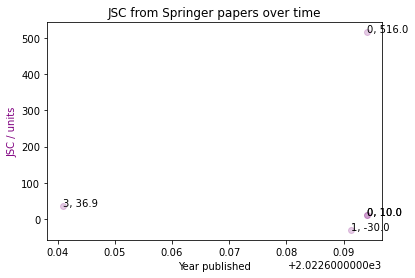

[2022.6940639269408, 2022.6940639269408, 2022.6940639269408, 2022.6940639269408, 2022.6913242009134, 2022.6408675799087]
[10.0, nan, 516.0, 10.0, -30.0, 36.9]
0


In [34]:
# obtains x and y values for plotting a property against date 
# NOTE: temporarily store obtained values by running the next cell down, otherwise you can copy and paste the printed lists into the figure plotting cell 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from datetime import datetime

# OCV x1,y1  JSC x2,y2  FF x3,y3

# ---------------------------------------- INPUT BOX, please input all info ----------------------------------------

# input path of files

# Springer path
path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/SpringerPapers/SpringerXml/')
# RSC path
#path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/RSCPapers/RSCHtml/')
# Elsevier path
#path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/ElsevierPapers/')


# input path of figure if u want to save them
figpath = 'C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/Modifying Parsers, progress figures/'

# input publisher ['Springer', 'Elsevier', 'RSC']
publisher = 'Springer'

# input property ['OCV', 'JSC', 'FF']
propertie = 'JSC'

# input index of columns
datecol = 1
valcol = 4
filenocol = 0

# -------------------------------------------------- end of input box --------------------------------------------------


filename = path + f"data/{propertie}.csv"

x = pd.read_csv(filename, usecols = [datecol]) # dates
y = pd.read_csv(filename, usecols = [valcol]) # values
filenos = pd.read_csv(filename, usecols = [filenocol]) # filenos


original_len = len(x)

dates = []
values = []
filenumbers = [int(fileno[0]) for fileno in filenos.values.tolist()]

for date in x.values.tolist():
    year = float(str(date[0])[:4])
    month = float(str(date[0])[4:6])/12
    day = float(str(date[0])[6:])/365
    date_std = year+month+day
    dates += [date_std]

for value in y.values.tolist():
    not_convertable = False
    try:
        float(value[0])
    except:
        not_convertable = True
    if not_convertable == False:
        values += [float(value[0])]
    else:
        values += [None]

x = []
y = []
labels = []
for number, value in enumerate(values):
    if (value != None) and (value != float("nan")):
        x += [dates[number]]
        y += [values[number]]
        labels += [f"{filenumbers[number]}, {value}"]
        

x1=x
y1=y

final_len = len(x)
len_dif = final_len - original_len

fig, ax = plt.subplots(1,1)

plt.scatter(x1,y1, c = 'purple', alpha = 0.2)        
print(filenos)

# to find file of outliers, we label all points
for w, label in enumerate(labels):
    plt.annotate(label, (x1[w], y1[w]))

ax.set_title(f"{propertie} from {publisher} papers over time")
ax.set_xlabel('Year published')
ax.set_ylabel(f'{propertie} / units',c = 'purple' )

ax.grid (False)
plt.show()

timestamp = datetime.now()
plt.savefig(f"{figpath}{propertie} {publisher} {timestamp}" )   # save fig if you wish, remember to include full file path
print(x1)
print(y1)
print(len_dif)


In [18]:
# storing values in a dictionary

all_graphs = {}

all_graphs[f'{publisher} {propertie}'] = [x1, y1, len_dif]

all_graphs

{'Springer JSC': [[2022.6940639269408,
   2022.6940639269408,
   2022.6940639269408,
   2022.6940639269408,
   2022.6913242009134,
   2022.6408675799087],
  [10.0, nan, 516.0, 10.0, -30.0, 36.9],
  0]}

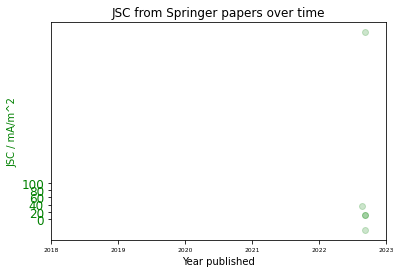

In [31]:
# plots scatter graph of property over time for a given publisher 

# ---------------------------------------- INPUT BOX, please input all info ----------------------------------------

# input publisher ['Springer', 'Elsevier', 'RSC']
publisher = 'Springer'

# input property ['OCV', 'JSC', 'FF']
propertie = 'JSC'

# input units
units = 'mA/m^2'

# input colour ['red', 'blue', 'green']
colour = 'green'
# -------------------------------------------------- end of input box --------------------------------------------------

import matplotlib.pyplot as plt
nan = None

x_plots = all_graphs[f'{publisher} {propertie}'][0]
y_plots = all_graphs[f'{publisher} {propertie}'][1]

fig, ax = plt.subplots(1,1)

plt.scatter(x_plots,y_plots, c = colour, alpha = 0.2)        

plt.xticks([ 2018,2019, 2020, 2021, 2022,2023], fontsize=6)  # can change xticks to fit data

plt.yticks([0, 20,40,60,80,100], fontsize=12, c = colour) # can change yticks to fit data

ax.set_title(f"{propertie} from {publisher} papers over time")
ax.set_xlabel('Year published')
ax.set_ylabel(f'{propertie} / {units}',c = colour )

ax.grid (False)
plt.show()

# plt.savefig(figname+'test_I3.tif')   # save fig if you wish, remember to include full file path

# observations for improving parsers 

### the code below may be useful in figuring out how to refine the parsers. it is left in for you to use if you wish. officially, the main code has ended already. :D

Wide range of values for JSC likely due to different units



In [ ]:
# JSC data inspection

"""

Springer Papers: 5 VALUES (Fig. 'JSC Springer')

0 - 10 detected "NiRu-0.2 SAC exhibited remarkable oxygen evolution activity of 210 mV at 10 mA cm<sup>−2</sup> and a water-splitting 
                 ability of 1.5 V@10 mAcm<sup>−2</sup>"
    516 detected "The optimized a-MoS<italic>x</italic> exhibited high electrocatalytic activity with an overpotential of 250 mV, Tafel 
                 slope of 40 mV dec<sup>−1</sup>, and large current density of 516 mA cm<sup>−2</sup>"
     
   ~ mA cm<sup>−2</sup>, mAcm<sup>−2</sup>
   
1 - "higher scan rates lead to higher polarization resulting in a higher deposition rate [<xref ref-type="bibr" rid="CR27">
     27</xref>, <xref ref-type="bibr" rid="CR28">28</xref>]. Thereby, higher values of the cathodic current density of about
     -30 mA cm<sup>−2</sup> could be obtained"
     !!! NOTE: it seems this paper is deemed relevant because the title of a paper it has cited has Antimony Selenide in it. 
          the article is about thin film somethings
   
   ~ mA cm<sup>−2</sup>
   
3 - "The total area (0.24 cm<sup>2</sup>) efficiency is 12.45 %, with a <italic>V</italic><sub>OC</sub> of 479 mV, a fill 
     factor (FF) of 70.45% and a short-circuit current density (<italic>J</italic><sub>SC</sub>) of 
     36.9 mA cm<sup>−</sup><sup>2</sup> (integrated <italic>J</italic><sub>SC</sub> from EQE is 
     37.0 mA cm<sup>−</sup><sup>2</sup>)."

   ~ mA cm<sup>−</sup><sup>2</sup>

Conc: all these values were detected but only by using 'mA' as units. 
      perhaps current density is different to short-circuit current density. 
      the papers may not be completely relevant still.
      A tiny amount of values were extracted, most of the files, JSC could not be extracted.

"""
# check with relevancy dictionaries for the files extracted

"""
! 0.xml is IRRELEVANT: {b'antimony selenide': 0, b'photovoltaic': 7, b'solar cell': 5}
1.xml is relevant: {b'antimony selenide': 1, b'photovoltaic': 6, b'solar cell': 13}
! 3.xml is IRRELEVANT: {b'antimony selenide': 0, b'photovoltaic': 19, b'solar cell': 59}

Conc: it seems that the values extracted were not specific to antimony selenide. I will check the files now marked relevant
      and run the extractor on the Springer papers again because perhaps the extraction failed midway which is why it 
      stopped at file 3.

"""

In [50]:
# relevant file inspection, this code will take key word inputs, detect them in the files and print the surrounding text of the key words, use it to inspect values detected for each file are correct 


# ---------------------------------------- INPUT BOX, please input all info ----------------------------------------

# input path of files

# Springer path
path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/SpringerPapers/SpringerXml/')
# RSC path
# path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/RSCPapers/RSCHtml/')
# Elsevier path
# path = ('C:/Users/Shirley/OneDrive - Imperial College London/Desktop/Folders/Summer UROP 2022 with Aron/Code/APIs/jup notebook/ElsevierPapers/')

# input type of file e.g. 'xml' or 'html'
filetype = 'xml'

# input number of the highest number file -  - 122 - 174 -
maxfile = 77

# input word(s) to detect 
key_words = ['short circuit', 'current density', 'antimony selenide']

# input the total ignored files list
total_ignored_files = [72, 73, 74, 75, 0, 2, 3, 7, 8, 9, 10, 11, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 35, 36, 38, 41, 42, 43, 45, 47, 48, 49, 51, 52, 53, 55, 56, 58, 59, 64, 65, 66, 68, 70, 71, 76, 77]

# -------------------------------------------------- end of input box --------------------------------------------------

for i in range(maxfile +1 ):
    if (i in total_ignored_files) == False:
        with open(path + f'{str(i)}.{filetype}', 'r', encoding='utf-8') as f:
            readlines = f.readlines()
            for line in readlines:
                linenotlower = line
                linelower = line.lower()
                for word in key_words:
                    templine = linelower
                    templinenotlower = linenotlower
                    if (word in templine):
                        count = templine.count(word)
                        print(' ')
                        print (f"[file {i}] {count}x {word} in line: ")
                        while count > 0:
                            
                            position = templine.find(word)
                            print (templinenotlower[position - 40:position + 80])
                            count-=1
                            templine = templine[position +5:]
                            templinenotlower = templinenotlower[position +5:]
                        break
                else:
                    pass
    else:
        pass

 
[file 1] 2x current density in line: 
g the electrodeposition process such as current density, deposition potential, scan rate, concentration, temperature, ad
re performed at different potential and current density values concluded from the LSV curves. The obtained potentiostati
 
[file 1] 2x current density in line: 
R25">25</xref>], which explain that the current density is directly proportional to the diffusion and scan rate. This ca
 Thereby, higher values of the cathodic current density of about -30 mA cm<sup>−2</sup> could be obtained in a potential
 
[file 1] 2x current density in line: 
(mol cm<sup>−3</sup>). As a result, the current density ranging from 0 to − 40 mA cm<sup>−2</sup> is suitable for the de
e observed results demonstrate that the current density increases rapidly to its maximum value (I<sub>max</sub> and t<su
 
[file 1] 1x current density in line: 
 based on mass transfer that limits the current density for these two types of growth mechanisms and identified as